# Heart Failure Prediction

**Reference**
- [Heart Fail:Analysis and Quick-prediction (NAYAN SAKHIYA)](https://www.kaggle.com/code/nayansakhiya/heart-fail-analysis-and-quick-prediction)

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## Data Preprocessing

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')
#df = df.drop(df.loc[df['creatinine_phosphokinase']>3000].index, axis=0)
# df = pd.get_dummies(df)

#float_columns = [x for x in df.columns if x not in ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']]
#sc = StandardScaler()
#df2 = df.copy()
#df[float_columns] = sc.fit_transform(df[float_columns])

#df.to_csv('Heart_Failure_scaled.csv', encoding='utf-8-sig')

X = df.drop(['DEATH_EVENT'], axis=1)
T = df['DEATH_EVENT']
X.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10


## Train Test Split

In [4]:
from sklearn.model_selection import train_test_split

Features = ['time', 'ejection_fraction', 'serum_creatinine']
X = df[Features]
x_train, x_test, y_train, y_test = train_test_split(X, T, test_size=0.2, random_state=2)

## Modeling

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score
from colorama import Fore

accuracy_list=[]

### Logistic Regression

In [553]:
from sklearn.linear_model import LogisticRegression

### Support Vector

In [554]:
from sklearn.svm import SVC

### K Neighbors Classifier

In [555]:
from sklearn.neighbors import KNeighborsClassifier

### Decision Tree Classifier

In [556]:
from sklearn.tree import DecisionTreeClassifier

### Random Forest Classifier

In [557]:
from sklearn.ensemble import RandomForestClassifier

### Gradient Boosting Classifier

In [558]:
from sklearn.ensemble import GradientBoostingClassifier

### XGBRF Classifier

In [559]:
import xgboost as xgb

### LGBM Classifier


[**Reference...**](https://nurilee.com/2020/04/03/lightgbm-definition-parameter-tuning/)
- **Gradient Boosting Framework**
- ML Algorithm based on **Tree Model**
    - Light GBM: **Tree가 수직적으로 확장**
        - Leaf-wise 방식
        <img src="./Leaf_wise_tree_growth.png" width="500px" height="400px" title="Leaf_wise"></img>
    - Others: **Tree가 수평적으로 확장**
        - Level-wise 방식
        <img src="./Level_wise_tree_growth.png" width="400px" height="250px" title="Level_wise"></img>

- **Light GBM이 인기를 얻게된 이유**
    - 속도가 빠름
    - 큰 사이즈의 데이터를 다룰 수 있으며 적은 메모리 공간을 차지
    - 정확도가 높음
    - GPU gkrtmqdmf wldnjs
- **Light GBM 사용처**
    - 작은 데이터셋에는 부적합
    - Overfitting에 민감
    - row size에 대한 제한은 없으나 10,000개 이상에 권장
- **Light GBM 구현**
    - Parameter tuning이 복잡 (100개 이상)

**Parameters**  
- `max_depth`: 
    - Tree의 최대 깊이. 과적합을 해결할 때 사용
- `min_data_in_leaf`: 
    - Leaf가 가지고 있는 최소한의 레코드 수
    - 과적합을 해결할 때 사용
    - 큰 값으로 세팅함으로써 Tree가 너무 깊게 확장되는 것을 방지할 수 있음
        - 하지만 underfitting이 발생할 수 있음
    - 관행적으로 수백~수천 개로 정하는 것이 큰 데이터셋에서 충분
    - *default value 20
- `feature_fraction`:
    - Boosting이 Random Forest일 경우 사용
    - 0.8 feature_fraction
        - Light GBMdl Tree를 만들 때 매번 각각의 iteration 반복에서 파라미터 중에 80%를 랜덤하게 선택
- `bagging_fraction`:
    - 매번 iteration을 돌 때 사용되는 데이터의 일부를 선택하는데 트레이닝 속도를 높이고 과적합을 방지할 때 주로 사용
- `early_stopping_round`:
    - 분석 속도를 높이는데 도움을 줌
    - 모델은 만약 어떤 validation 데이터 중 하나의 지표가 지난 early_stopping_round 라운드에서 향상되지 않았다면 학습을 중단함
        - 이는 지나친 iteration을 줄이는데 도움을 줌
- `lambda`:
    - lambda값은 regularization 정규화를 함
    - 0~1 사이
- `min_gain_to_split`:
    - 분기하기 위해 필요한 최소한의 gain을 의미
    - Tree의 유용한 분기수를 컨트롤하는데 사용
- `max_cat_group`:
    - 카테고리 수가 클 때, 과적합을 방지하는 분기포인트를 찾음
    - Light GBM 알고리즘이 카테고리 그룹을 max_cat_group 그룹으로 합치고 그룹 경계선에서 분기 포인트를 찾음
    - *default value 64

**Core Parameters**
- `Task`:
    - 데이터에 대해서 수행하고자 하는 임무를 구체화
    - training or prediction
- `application`:
    - 가장 중요한 파라미터로, 모델의 어플리케이션을 정함
    - regression or classification
    - dafault value $\text{regression}$
        - regression: 회귀분석
        - binary: 이진 분류
        - multiclass: 다중 분류
- `boosting`:
    - 실행하고자 하는 알고리즘 타입을 정의
    - default value $\text{gdbt}$
        - gdbt: Traditional Gradient Boosting Decision Tree
        - rf: Random Forest
        - dart: Dropouts meet Multiple Additive Regression Trees
        - goss: Gradient-based One-Side Sampling
- `num_boost_round`:
    - boosting iteration 수로 일반적으로 100 이상
- `learning_rate`:
    - 최종 결과에 대한 각각의 Tree에 영향을 미치는 변수
    - GBM은 초기 수정값에서 시작하여 각각의 Tree 결과를 사용하여 추정값을 업데이트
    - 학습 파라미터는 이러한 추정에서 발생하는 변화의 크기를 컨트롤
    - 일반적인 값으로 0.1, 0.001, 0.003 등이 있음
- `num_leaves`:
    - Tree 모델의 복잡성을 컨트롤하는 주요 파라미터
    - 전체 Tree의 leaves 수를 나타냄
    - 이상적으로 num_leaves 값은 2**(max_depth)값보다 적거나 같아야 함
        - 이 것보다 많으면 과적합 유발
    - default value 31
- `device`:
    - default value $\text{cpu}$

**Metric Parameter**
- `metric`:
    - 모델을 구현할 때 손실을 정리하기 때문에 중요한 변수 중 하나
    - regression과 classification을 위한 일반적인 손실 값으로
        - mae: mean absolute error
        - mse: mean squared error
        - binary_logloss: loss for binary classification
        - multi_logloss: loss for multi classification

**IO Parameter**
- `max_bin`:
    - feature 값의 최대 bin 수를 의미  
- `categorical_features`:
    - 범주형 feature 인덱스를 의미
    - categorical_features가 0,1,2 이면 column 0, column 1, column 2가 범주형 변수들
- `ignore_column`:
    - categorical_features와 거의 동일
    - feature로써 특정 칼럼을 고려하지 않음 (해당 변수들을 무시)
- `save_binary`:
    - 데이터 파일의 메모리 사이즈를 처리해야한다면 해당 파라미터를 True로 설정
    - 해당 값이 True일 때, 데이터 세트는 바이너리 파일로 저장
    - 이 바이너리 파일은 다음에 데이터를 읽어올 때 그 속도를 줄여줌

**더 빠른 속도**
- `bagging_fraction` & `baggin_freq`를 설정하여 bagging을 적용
- `feature_fraction`을 설정하여 feature sub-sampling을 시도
- 작은 `max_bin` 값 적용
- `save_binary`를 통해 향후 학습에서 데이터 로딩 속도를 감소
- parallel learning 시도

**더 높은 정확도**
- 큰 `max_bin` 값 적용
- 작은 `learning_rate`값을 큰 `num_iterations`값과 함께 적용
- 큰 `num_leaves`값을 사용 (과적합을 유발)
- 더 큰 traing data 사용
- dart 사용
- categorical feature 사용

**과적합 해결**
- 작은 `max_bin` 값 사용
- 작은 `num_leaves` 값을 사용
- `min_data_in_leaf`와 `min_sum_hessian_in_leaf` 파라미터를 사용
- `bagging_fraction`과 `bagging_freq`를 사용하여 bagging을 적용
- `feature_fraction`을 설정하여 feature sub-sampling을 시도
- lambda_l1, lambda_l2 그리고 `min_gain_to_split` 파라미터를 이용해 regularization을 적용
- `max_depth`를 설정해서 Deep Tree가 만들어지는 것을 방지

In [6]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(max_depth=2,random_state=4)
lgb_clf.fit(x_train, y_train)
lgb_pred = lgb_clf.predict(x_test)
lgb_acc = accuracy_score(y_test, lgb_pred)
accuracy_list.append(100*lgb_acc)
print(Fore.GREEN + f'Accuracy of LGBM Classifier is : {100*lgb_acc:.2f}%')

Accuracy of LGBM Classifier is : 86.67%


In [13]:
import lightgbm
lgb_clf = lightgbm.LGBMClassifier(max_depth=2, random_state=4)
lgb_clf.fit(x_train,y_train)
lgb_pred = lgb_clf.predict(x_test)
lgb_acc = accuracy_score(y_test, lgb_pred)
accuracy_list.append(100*lgb_acc)

In [15]:
print(Fore.GREEN + "Accuracy of LGBMClassifier is : ","{:.2f}%".format(100* lgb_acc))

Accuracy of LGBMClassifier is :  86.67%


<Figure size 432x288 with 0 Axes>

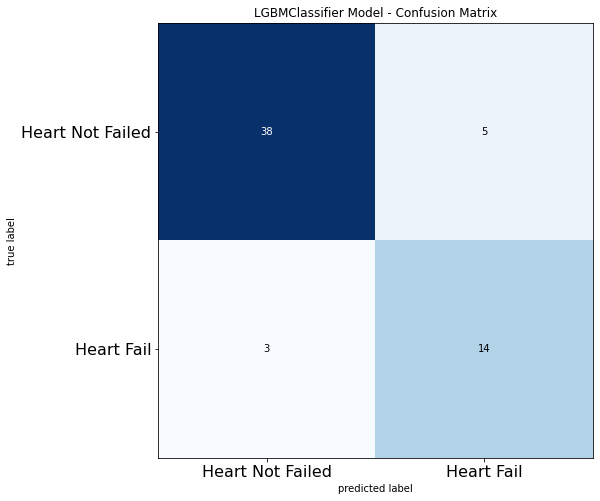

In [16]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, lgb_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("LGBMClassifier Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [561]:
d_train = lgb.Dataset(x_train, label=y_train)
params={}
params['boosting_type'] = 'gbdt'
params['num_leaves'] = 2
params['max_depth'] = 2
#params['max_bin'] = 1000
params['learning_rate'] = 0.1
params['force_row_wise']=True
params['objective'] = 'binary'

lgb_clf2 = lgb.train(params, d_train)

[LightGBM] [Info] Number of positive: 79, number of negative: 160
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 239, number of used features: 3
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.330544 -> initscore=-0.705726
[LightGBM] [Info] Start training from score -0.705726


In [562]:
import numpy as np

lgb_pred2 = lgb_clf2.predict(x_test)
preds_ld = lgb_pred2.flatten()
pred_class = np.where(preds_ld >=0.5, 1, 0)
lgb_acc2 = accuracy_score(y_test, pred_class)
print(Fore.GREEN + f'Accuracy of LGBM Classifier is : {100*lgb_acc2:.2f}%')

Accuracy of LGBM Classifier is : 83.33%


### Cat Boost Classifier

In [467]:
from catboost import CatBoostClassifier

ModuleNotFoundError: No module named 'catboost'